# Convolutional Neural Networks

## Motivation: Image Classification
![](resources/pixels.png)
Source: http://www.survint.com/megapixeltech.php

In [20]:
input_features_1mp = 1280 * 1024
print(f'{round(input_features_1mp/1e6, 1)} milion input features')

1.3 milion input features


## Size of Neural Network with 1 hidden layer for 10-class classification problem

In [21]:
!pip install torchsummary
import torch 
import torchvision
import torchsummary

In [23]:
hidden_size = 512

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=input_features_1mp, out_features=hidden_size, bias=True),
    torch.nn.Linear(in_features=hidden_size, out_features=10, bias=True)
)

print(model)

Sequential(
  (0): Linear(in_features=1310720, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=10, bias=True)
)


In [24]:
torchsummary.summary(model, input_size=(1, input_features_1mp))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]     671,089,152
            Linear-2                [-1, 1, 10]           5,130
Total params: 671,094,282
Trainable params: 671,094,282
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 5.00
Forward/backward pass size (MB): 0.00
Params size (MB): 2560.02
Estimated Total Size (MB): 2565.03
----------------------------------------------------------------


### Over 2.5 GB worth of a model!

### Now imagine input features of 12MP size, and even bigger models(many dozens of layers are usually used)

In [17]:
model = torchvision.models.resnet18() 
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Convolutional neural networks

![](resources/cnn1.png)
Source: https://en.wikipedia.org/wiki/Convolutional_neural_network

![](resources/cnn.png)
Source: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

### New layer types:
- Convolutional layers
- Pooling layers
#### Goal - Decrease size

## Convolutional Layers / Feature Maps

## Applying different image kernels traditionally
![](resources/kernel_examples.png)

Source: https://en.wikipedia.org/wiki/Kernel_(image_processing)

![](resources/conv1.png)
Source: https://cs231n.github.io/convolutional-networks/

![](resources/conv2.png)
Source: https://cs231n.github.io/convolutional-networks/

- We usually apply multiple filters/kernels on the input
- Each filter scans the image for one particular "feature", the resulting tensor is called feature map
- Stride: Translation speed of a single filter(above we have stride=2)
- Padding: Frame of zeros that we append on the input, to apply filter to all parts of image(corners) and regulate output size
- Bias: As before
- Computing the feature map size:

Let $size(input) = (I_x \times I_y)$, and $size(filter)=(k_x \times k_y)$. Then the feature map output is $size(output)=(o_x\times o_y)$, where:
- $o_x = \frac{(I_x-k_x)+2 \cdot padding_x}{stride}+1$
- $o_y = \frac{(I_y-k_y)+2 \cdot padding_y}{stride}+1$

### Single filter applied to one spatial location
<img src="resources/single_feature.png"  width="800"/>
Source: https://www.quora.com/What-is-meant-by-feature-maps-in-convolutional-neural-networks
### Multiple filters applied to same spatial location 
<img src="resources/feature.png"  width="600"/>
Source: https://en.wikipedia.org/wiki/Convolutional_neural_network

## Where do we get the filter matrices from ??
# $\Rightarrow$ Training through Gradient Descent!!

# Pooling Layers / Subsampling

![](resources/max_pooling.png)
Source: https://en.wikipedia.org/wiki/Convolutional_neural_network

- Intuition: Compress spatial information into lower representation 
- ***no learnable*** parameters
- #input channels = #output channels
- Although of max pooling is the most common, we may choose min pooling, average pooling or other strategies

## Fully-connected layer: Same as for MLP

## New non-linear function introduce: ReLU

In [25]:
import numpy as np
import matplotlib.pyplot as plt

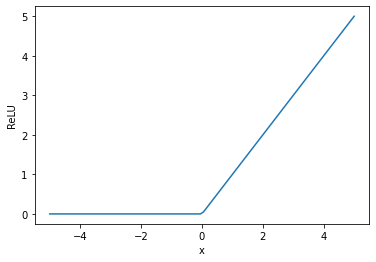

In [26]:
x = np.linspace(-5,5 ,100)
f_x = np.maximum(x, 0) 
plt.plot(x, f_x), plt.xlabel('x'), plt.ylabel('ReLU');

- easy gradient computation(either 0 or 1) -> safes computation time
- sparsifies activations -> safes computation time

## Final Network:
![](resources/cnn1.png)
Source: https://en.wikipedia.org/wiki/Convolutional_neural_network

## PyTorch implementation

## 0. Do the imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

## 1. Load and preprocess the data

In [2]:
all_transforms = transforms.Compose([
        transforms.ToTensor()
    ])

train_set = torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                                       transform=all_transforms)
test_set = torchvision.datasets.FashionMNIST('./data', train=False,
                                      transform=all_transforms)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32)

class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

num_classes = len(class_names)

Ankle Boot


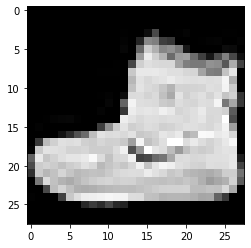

In [4]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(class_names[label])

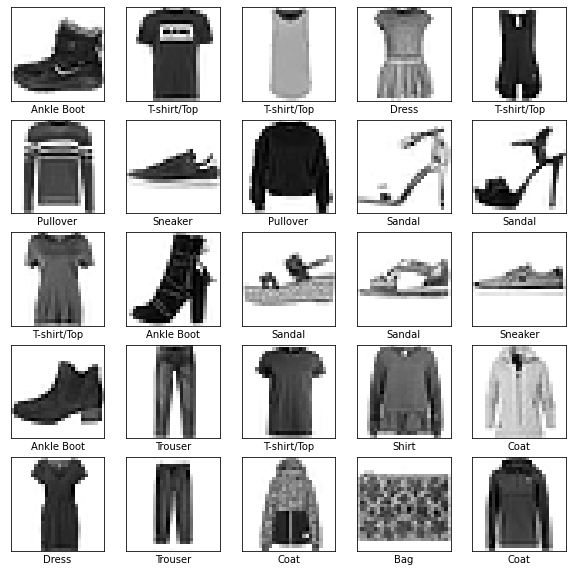

In [69]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train_set.data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_set.targets[i]]) 
plt.show()

### 2. Implement the model

In [6]:
class ConvNet(torch.nn.Module):
    
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        # calculate same padding:
        # (w - k + 2*p)/s + 1 = o
        # => p = (s(o-1) - w + k)/2
        
        # 28x28x1 => 28x28x8
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=(1, 1), padding=1) # (1(28-1) - 28 + 3) / 2 = 1
        
        self.relu_1 = torch.nn.ReLU()
        
        # 28x28x8 => 14x14x8
        self.pool_1 = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0) # (2(14-1) - 28 + 2) = 0                                       
        
        # 14x14x8 => 14x14x16
        self.conv_2 = torch.nn.Conv2d(in_channels=8, out_channels=6, kernel_size=(3, 3), stride=(1, 1), padding=1) # (1(14-1) - 14 + 3) / 2 = 1  
        
        self.relu_2 = torch.nn.ReLU()
        
        # 14x14x16 => 7x7x16                             
        self.pool_2 = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0) # (2(7-1) - 14 + 2) = 0

        self.linear_1 = torch.nn.Linear(7*7*6, num_classes)
        #self.sig = torch.nn.Sigmoid()
        #self.linear_2 = torch.nn.Linear(7*7*16, num_classes)
        
    def forward(self, x):
        out = self.conv_1(x)
        out = self.relu_1(out)
        out = self.pool_1(out)
 
        out = self.conv_2(out)
        out = self.relu_2(out)
        out = self.pool_2(out)
        
        logits = self.linear_1(out.view(-1, 7*7*6))
        
        return logits

In [13]:
model = ConvNet(num_classes=num_classes)

### 3. Train the model

In [14]:
# helper function to collect accuracies
def eval_fn(model, dataloader):
    # Test loop
    # Put model in evaluation mode
    model.eval()
    total_correct = 0.0

    for imgs, labels in dataloader: 
        logits =  model(imgs)
    
        # get predictions
        _, preds = logits.max(dim=1)
    
        # Compute sum of correctly classified points for this batch
        correctly_classified = (preds == labels).sum().numpy()
     
        # add number of correctly classified points of this batch to total number
        total_correct += correctly_classified
    
    # Compute overall accuracy
    acc = total_correct / len(dataloader.dataset)
 
    print(f'Accuracy : {acc*100}%')
    
    return acc

In [15]:
# Define loss fucntion and optimization algorithm
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

In [16]:
# 2. Implement the training loop

train_accs = [] 
test_accs = []

epochs = 10
for epoch in range(epochs):
    
    # Training statistic that tracks progress
    running_loss = 0.0
    
    for i, (imgs, labels) in enumerate(train_loader):
        
        # zeor the parameter gradients of last loop
        optimizer.zero_grad()
        
        # Logits are essentially the predictions before converting them to probability scores(e.g. through SoftMax)
        logits = model(imgs)
        
        loss = loss_fn(logits, labels)
        
        # Compute Gradients
        loss.backward()
        
        # Apply Gradient Descent
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 500 == 0:
            print(f'Epoch: {epoch}, batch: {i}, loss: {running_loss / 500}')
            running_loss = 0.0
    
    print(f'\nTraining acc. after epoch {epoch}:')
    train_accs.append(eval_fn(model, train_loader))
    print(f'\nTest acc. after epoch {epoch}:')
    test_accs.append(eval_fn(model, test_loader))

Epoch: 0, batch: 0, loss: 0.004652258396148682
Epoch: 0, batch: 500, loss: 1.7311905094385147
Epoch: 0, batch: 1000, loss: 0.8439239978790283
Epoch: 0, batch: 1500, loss: 0.721901394546032

Training acc. after epoch 0:
Accuracy : 75.92%

Test acc. after epoch 0:
Accuracy : 74.62%
Epoch: 1, batch: 0, loss: 0.0011724495887756347
Epoch: 1, batch: 500, loss: 0.6374279839098453
Epoch: 1, batch: 1000, loss: 0.6005799666643142
Epoch: 1, batch: 1500, loss: 0.5594980250895023

Training acc. after epoch 1:
Accuracy : 80.025%

Test acc. after epoch 1:
Accuracy : 78.67%
Epoch: 2, batch: 0, loss: 0.0009510856866836548
Epoch: 2, batch: 500, loss: 0.5201069756150246
Epoch: 2, batch: 1000, loss: 0.5026940794885159
Epoch: 2, batch: 1500, loss: 0.48166119247674943

Training acc. after epoch 2:
Accuracy : 82.77666666666667%

Test acc. after epoch 2:
Accuracy : 81.85%
Epoch: 3, batch: 0, loss: 0.0008214130401611328
Epoch: 3, batch: 500, loss: 0.46264454947412015
Epoch: 3, batch: 1000, loss: 0.454663088709

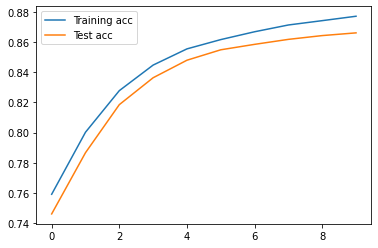

In [20]:
plt.plot(train_accs, label="Training acc")
plt.plot(test_accs, label="Test acc")
plt.legend();